In [2]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append(os.path.dirname(os.getcwd()))
import joblib
#Import block from src
from src.util.helper import read_data,convert_to_pkl
from src.util.preparator import union,prepare_training
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from settings import setting
sns.set_theme()


read in setting {'paths': {'wd': '/Users/fabiogruschka/Documents/uni/Archiv/ws2021/bachelor/bachelor_v2', 'data': '/Users/fabiogruschka/Documents/uni/Archiv/ws2021/bachelor/bachelor_v2/data/intern', 'prep_data': '/Users/fabiogruschka/Documents/uni/Archiv/ws2021/bachelor/bachelor_v2/data/prep_data', 'logs': '/Users/fabiogruschka/Documents/uni/Archiv/ws2021/bachelor/bachelor_v2/logs', 'reports': '/Users/fabiogruschka/Documents/uni/Archiv/ws2021/bachelor/bachelor_v2/reports', 'models': '/Users/fabiogruschka/Documents/uni/Archiv/ws2021/bachelor/bachelor_v2/models', 'scores': '/Users/fabiogruschka/Documents/uni/Archiv/ws2021/bachelor/bachelor_v2/data/scores', 'html': '/Users/fabiogruschka/Documents/uni/Archiv/ws2021/bachelor/bachelor_v2/src/assets/html'}, 'resolutions': array([ 50, 100, 150]), 'mode': {'prep': False, 'viz': False, 'pred': True, 'train': False}, 'models': {'rf': False, 'svm': False, 'cnn': False, 'lr': False, 'ridge_cv': False, 'ridge': True}, 'colors': ['Greens', 'Reds', 'B

In [3]:
with open(os.path.join(setting['paths']['scores'], 'scores_Mar-10-2021.json'),'r') as json_file:
    result_table = json.load(json_file)

result_table = pd.DataFrame(result_table)
result_table['d/p'],result_table['res'],result_table['sf/3']  = result_table['dataset'].str.split('_',2,expand=True)[0],result_table['dataset'].str.split('_',2,expand=True)[1],result_table['dataset'].str.split('_',2,expand=True)[2]

#add markers for every modell 
marker_list = ['.','v','>','x','p','s','d','<']
cl_list = result_table['classifiers'].unique()
concat_markers = list(zip(marker_list[:len(cl_list)],cl_list))


In [4]:
result_table.head()

classifiers    dataset                              fpr  \
0          Sequential  dna_100_1   [0.0, 0.7028112449799196, 1.0]   
1  LogisticRegression  dna_100_1  [0.0, 0.28112449799196787, 1.0]   
2   RidgeClassifierCV  dna_100_1   [0.0, 0.5927710843373494, 1.0]   
3          Sequential  dna_100_1  [0.0, 0.27228915662650605, 1.0]   
4   RidgeClassifierCV  dna_100_1   [0.0, 0.3855421686746988, 1.0]   

                              tpr        se        sp       acc       mcc  \
0  [0.0, 0.6906419180201083, 1.0]  0.297189  0.690642  0.497636 -0.008569   
1  [0.0, 0.6643464810518175, 1.0]  0.718876  0.664346  0.691095  0.394633   
2   [0.0, 0.559938128383604, 1.0]  0.407229  0.559938  0.485028 -0.027960   
3  [0.0, 0.6813611755607115, 1.0]  0.727711  0.681361  0.704098  0.417455   
4  [0.0, 0.5467904098994586, 1.0]  0.614458  0.546790  0.579984  0.169127   

        auc  d/p  res sf/3  
0  0.493915  dna  100    1  
1  0.691611  dna  100    1  
2  0.483584  dna  100    1  
3  0.704536  dna  100    1  
4  0.580624  dna  100    1

# auc vs mcc

In [9]:
sf = result_table['sf/3'].unique()
dp = result_table['d/p'].unique()

g  = sns.FacetGrid(result_table,col = 'd/p',row = 'sf/3',height=4, aspect = 3 )

g.map_dataframe(sns.scatterplot, 
                x="mcc",
                y="auc",
                hue="classifiers",
                style = 'res')

g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Matthew Correlation Coefficent vs AUC')
#g.set_titles(col_template="{col_name}", row_template="{row_name}")
#g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
#g.tight_layout()
g.add_legend()



In [13]:
sf = result_table['sf/3'].unique()
dp = result_table['d/p'].unique()

g  = sns.FacetGrid(result_table,col = 'd/p',row = 'sf/3',height=4, aspect = 3)

g.map_dataframe(sns.scatterplot, 
                x="se",
                y="sp",
                hue="classifiers",
                style = 'res')

g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Sensivity vs AUC')
#g.set_titles(col_template="{col_name}", row_template="{row_name}")
#g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
#g.tight_layout()
g.add_legend()


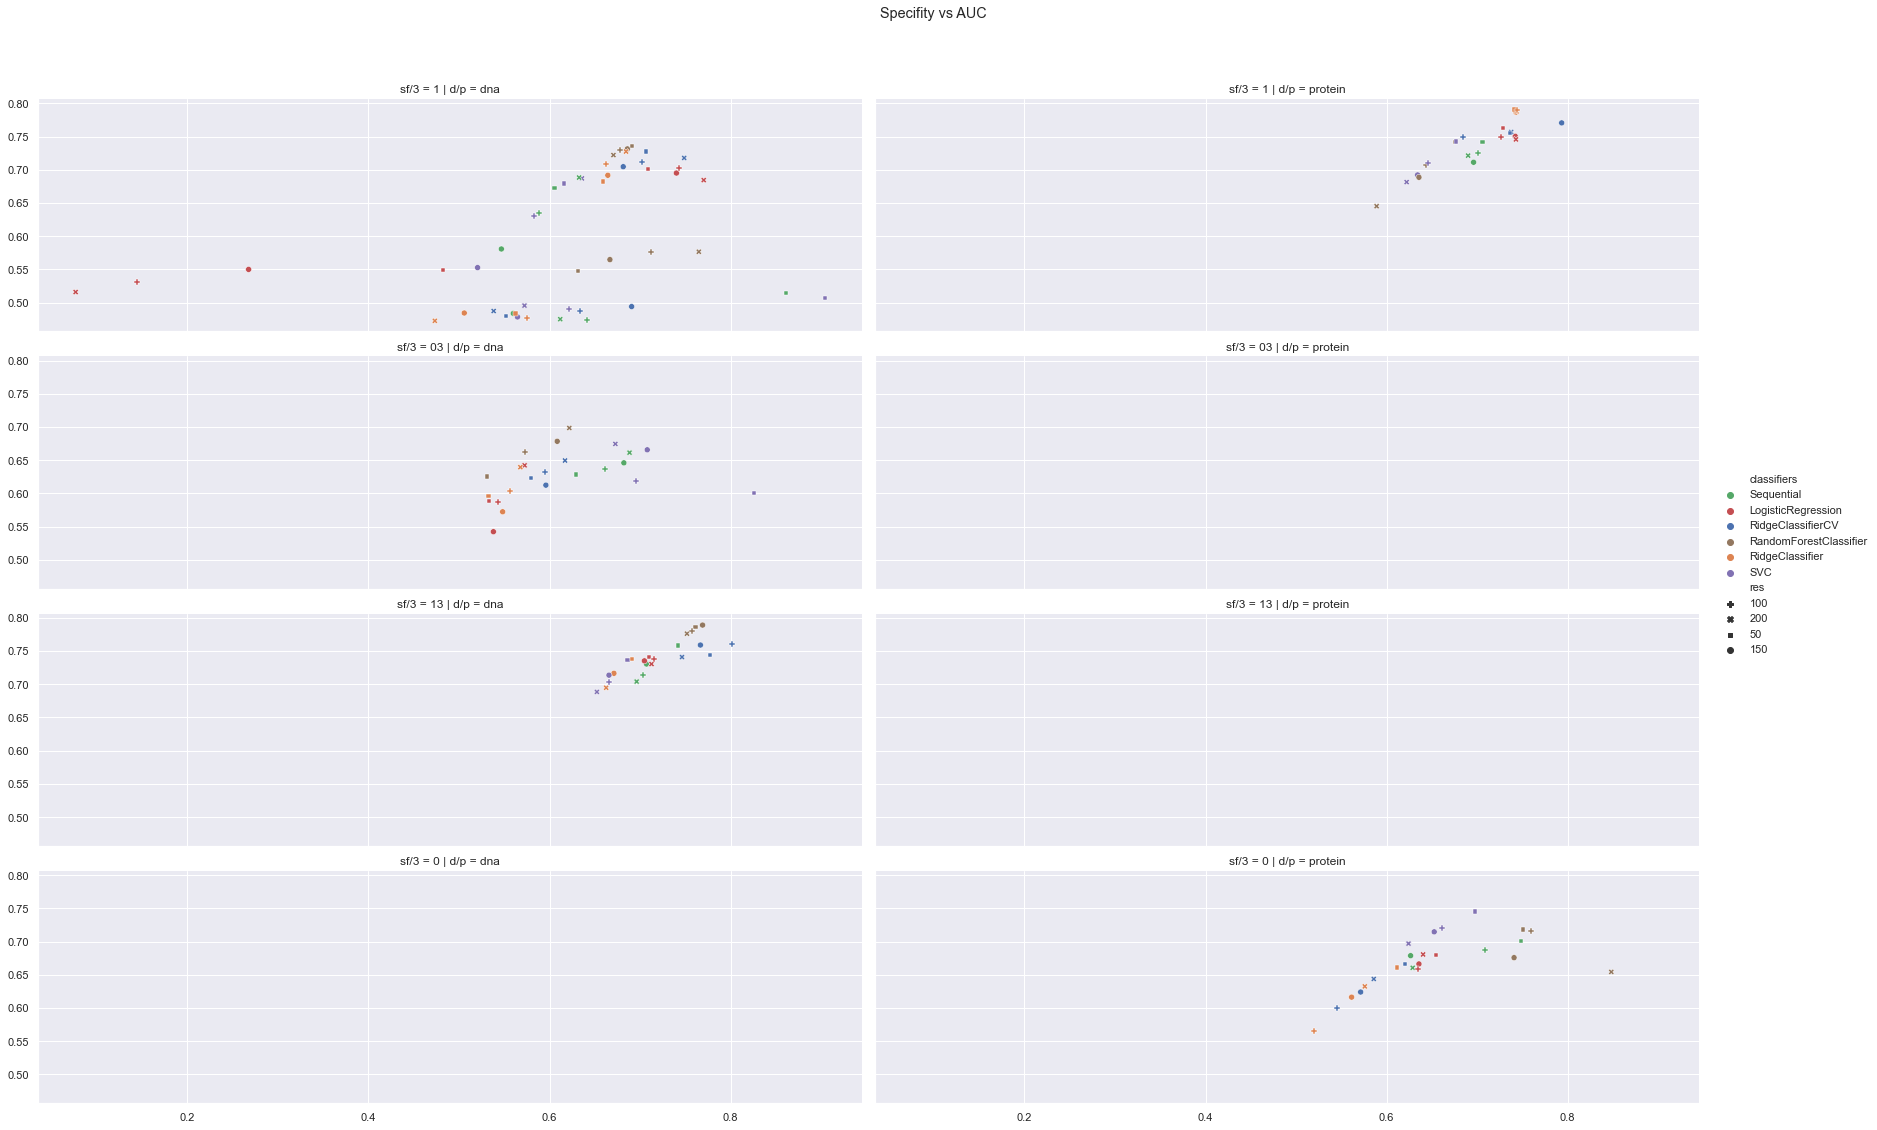

In [11]:
sf = result_table['sf/3'].unique()
dp = result_table['d/p'].unique()

g  = sns.FacetGrid(result_table,col = 'd/p',row = 'sf/3',height=4, aspect = 3)

g.map_dataframe(sns.scatterplot, 
                x="sp",
                y="auc",
                hue="classifiers",
                style = 'res')

g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Specifity vs AUC')
#g.set_titles(col_template="{col_name}", row_template="{row_name}")
#g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
#g.tight_layout()
g.add_legend()

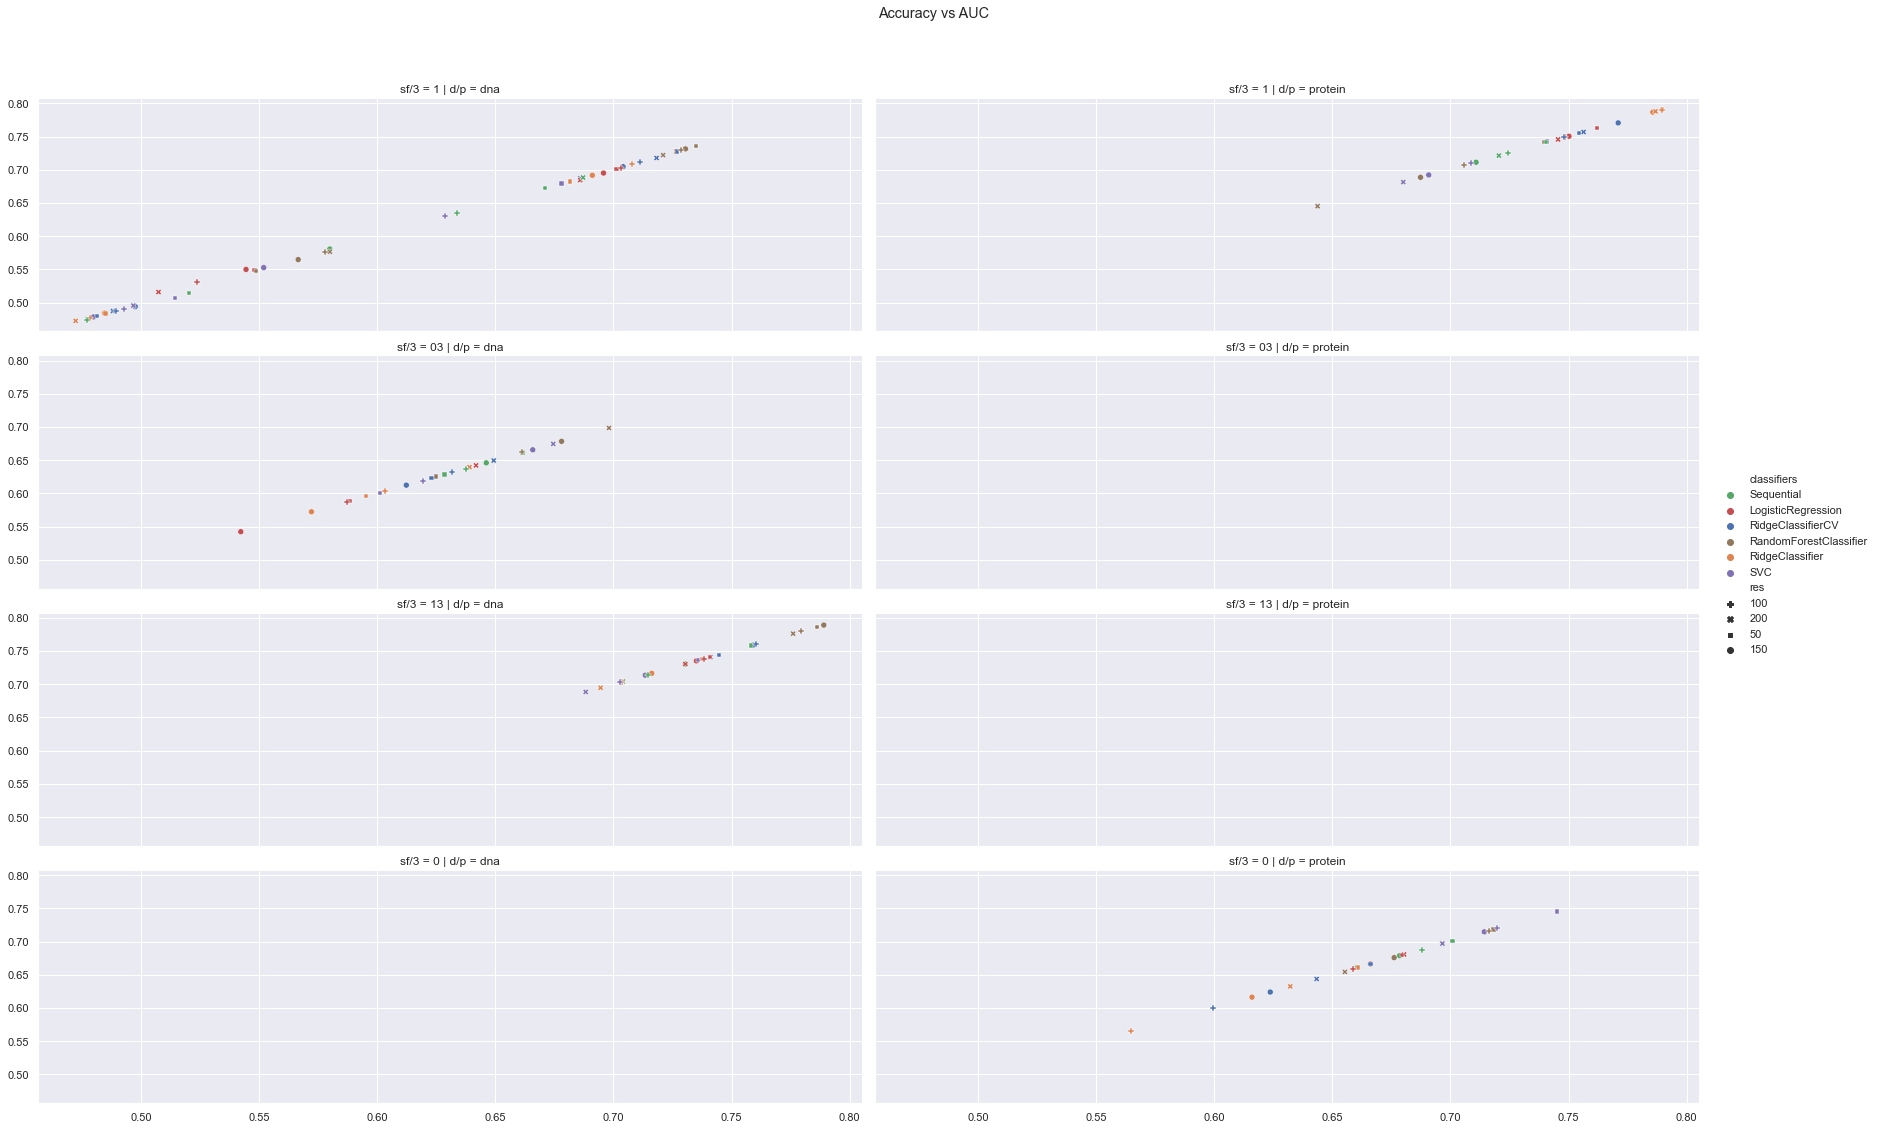

In [12]:
sf = result_table['sf/3'].unique()
dp = result_table['d/p'].unique()

g  = sns.FacetGrid(result_table,col = 'd/p',row = 'sf/3',height=4, aspect = 3)

g.map_dataframe(sns.scatterplot, 
                x="acc",
                y="auc",
                hue="classifiers",
                style = 'res')

g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Accuracy vs AUC')
#g.set_titles(col_template="{col_name}", row_template="{row_name}")
#g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
#g.tight_layout()
g.add_legend()
